# Analyze Samples
## Imports

In [1]:
import sys
sys.path.append('/home/jovyan/work/workspace')

In [2]:
import os

from matplotlib import pyplot as plt
import numpy as np

from tlib import tlearn, tgeo, tutils
from tjects.experiments.testbed18 import config, utils

from api_coverages import get_coverage

%load_ext autoreload
%autoreload 2

## Configuration

In [3]:
# Configuration for file
file_name = 'investigative/inv_hydroelectric-letsi_2019-07-01-2019-08-30.tif' # paper figure 8
#file_name = 'investigative/inv_valley-alvdal_2017-07-01-2017-08-30.tif'       # paper figure 9 (2017)
#file_name = 'investigative/inv_valley-alvdal_2020-07-01-2020-08-30.tif'       # paper figure 9 (2020)
#file_name = 'investigative/inv_forest-planted-1_2018-07-01-2018-08-30.tif'    # paper figure 10
#file_name = 'samples/s2_20.27_66.46_20.39_66.55.tif'                          # left part paper figure 8
#file_name = 'samples/s2_20.39_66.46_20.49_66.55.tif'                          # right part paper figure 8
file_name = os.path.join(config.data_folder, file_name)

In [4]:
# ToDo: add in pygeoapi_odc_provider
#channel_names = dataset.descriptions
#titles = ['blue', 'green', 'red', 'vegetation_red_edge1', 'vegetation_red_edge2', 'vegetation_red_edge3',
#          'nir', 'narrow_nir', 'swir1', 'swir2']

## Setup sample and plotter

In [5]:
channel_indices = {'B2': 0, 'B3': 1, 'B4': 2, 'B5': 3, 'B6': 4, 'B7': 5, 'B8': 6, 'B8A': 7, 'B11': 8, 'B12': 9}
s2_plotter = tgeo.s2.Plotter(folder_s2=os.path.join(config.data_folder_investigative),
                             channel_indices=channel_indices)

## Plot Sentinel-2 data

file: /home/martin/Projekte/OGC_Testbed-18/data/anthroprotect/investigative/inv_hydroelectric-letsi_2019-07-01-2019-08-30.tif
path:  /home/martin/Projekte/OGC_Testbed-18/data/anthroprotect/investigative/inv_hydroelectric-letsi_2019-07-01-2019-08-30.tif


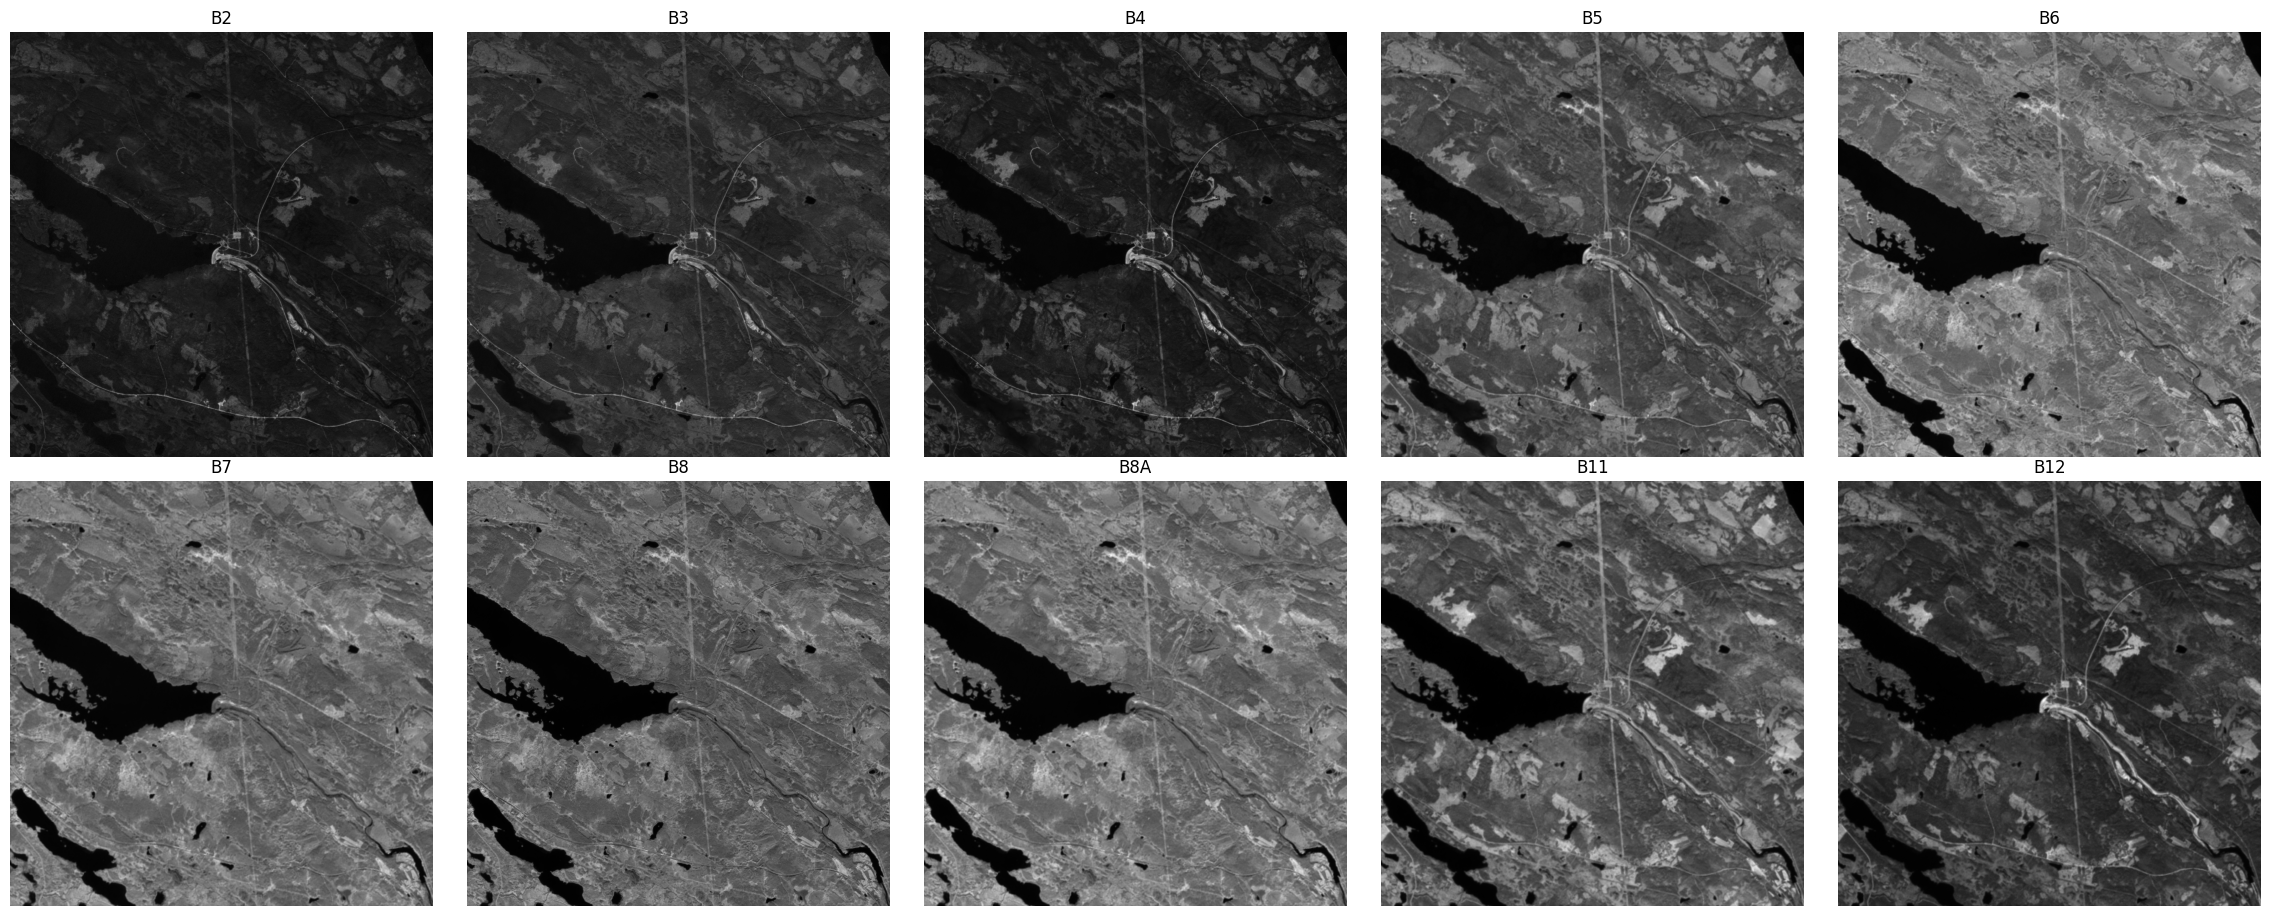

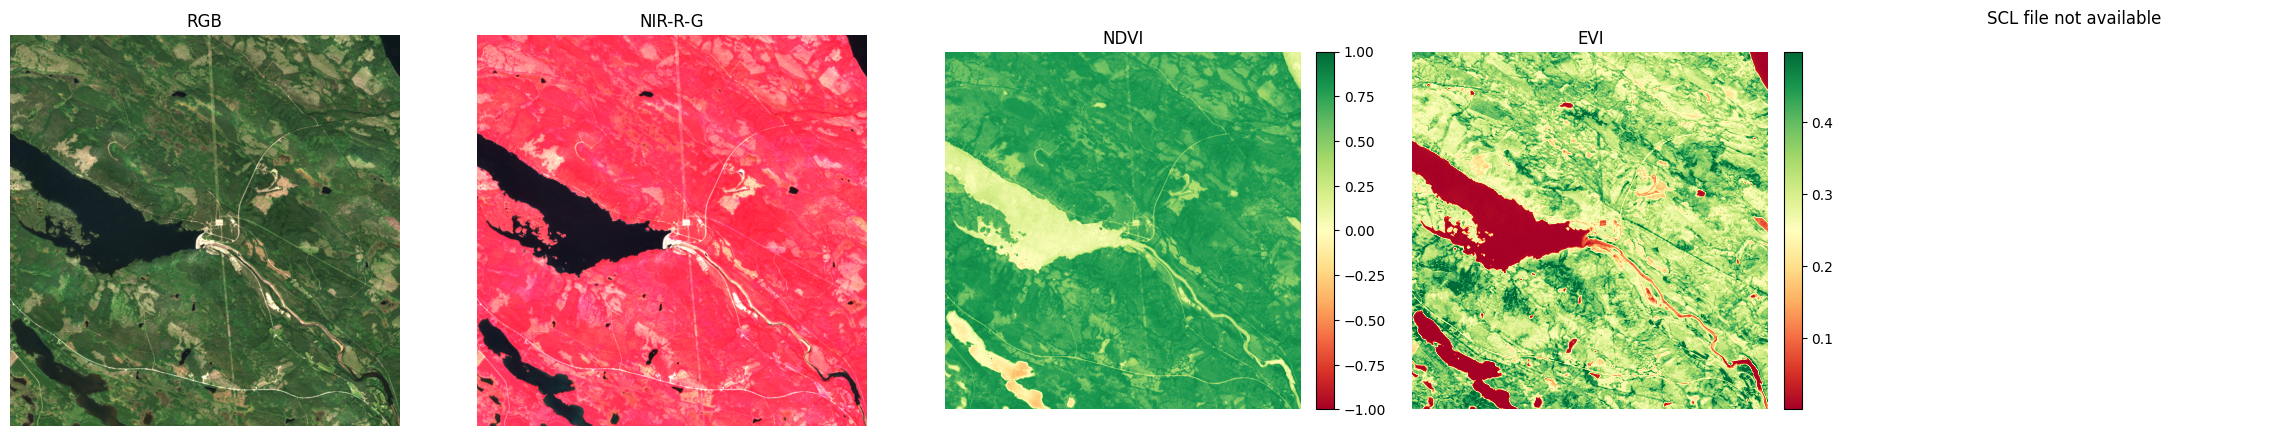

In [6]:
s2_plotter.plot(
    file_name,
    plot_s2=True,
    plot_s2_channels=True
)

## Predict activation map

In [7]:
unet_map = utils.predict_activation_maps(file_name)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.27s/it]


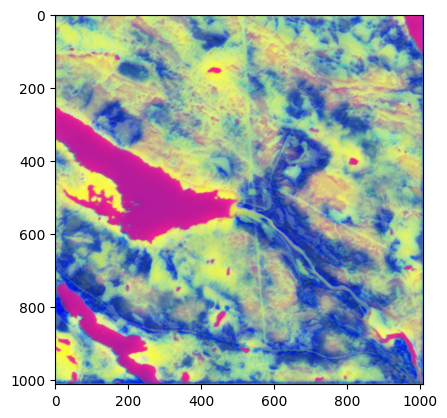

In [8]:
plt.imshow((np.array(unet_map)[0].transpose(1,2,0)+1)/2)

## Predict  sensitivity map

In [9]:
sensitivities = utils.predict_sensitivity_maps(file_name)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.29s/it]


predicting groups:   0%|          | 0/980 [00:00<?, ?it/s]

predicting sensitivities:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
asos = utils.load_asos()

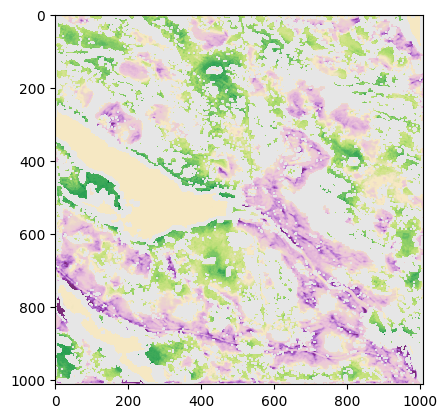

In [11]:
plt.imshow(sensitivities[0], cmap=asos.cmap, vmin=-asos.vlim, vmax=asos.vlim)

## All Files to RGB Tiff
Note: If you do not have a trained model, yet, you can ignore some of the plot_kwargs! To plot them, you need to predict the image.

In [12]:
#output_folder = os.path.join(config.working_dir, 'rgbs')  # os.path.join(utils.load_trainer().log_dir, 'rgbs')

In [13]:
## plotter
#s2_plotter.val_range_s2 = (0, 2**10.5)
#s2_plotter.to_tif(
#    *files,
#    output_folder=output_folder,
#    
#    plot_rgb=True,
#    #plot_false_colors=True,
#    #plot_channels=['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12'],
#    #plot_ndvi=True,
#    #plot_evi=True,
#    #plot_scl=True,
#    #plot_lcs=['CORINE', 'MODIS_1', 'CGLS', 'GlobCover'],  # ['CORINE', 'MODIS_1', 'CGLS', 'GlobCover']
#    #plot_masks=['BB'],#['ROI', 'Valid_Area'],  # ['ROI', 'Valid_Area']
#)
#
#asos_plotter.to_tif(
#    *files,
#    output_folder=output_folder,
#    
#    plot_unet_maps=True,
#    #plot_all_unet_maps=True,
#    plot_sensitivities=True,
#    #plot_osms=True,
#
#    batch_size=batch_size,
#)